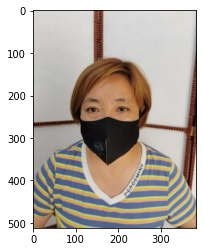

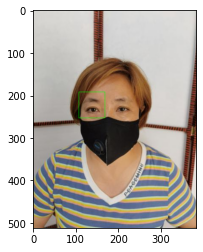

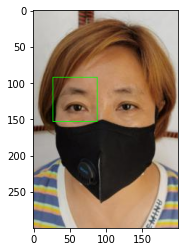

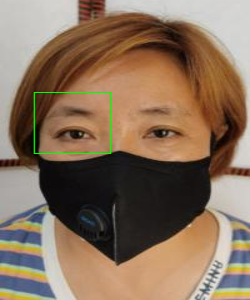

In [21]:
##### from PIL import Image
from torchvision import transforms, utils
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import numpy as np
from torchvision import transforms
%matplotlib inline

#img_cv2 = cv2.imread("/opt/ml/input/data/train/images/003108_female_Asian_19/mask5.jpg")
img_cv2 = cv2.imread("../input/data/train/images/000001_female_Asian_45/mask1.jpg")
#img_cv2 = cv2.imread("../input/data/train/images/000001_female_Asian_45/mask2.jpg")
rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB) # cv2 default BGR => RGB
plt.imshow(rgb)
plt.show()
cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#cascade = cv2.CascadeClassifier('./data/haar/haarcascade_frontface.xml')
face = cascade.detectMultiScale(rgb)

if len(face) == 0: # 못찾으면 가운데 쯤으로 crop
    croped = rgb[100:400, 80:280]
else:
    for x, y, w, h in face:
        if w < 100: # 얼굴을 제대로 못자르는 케이스
            cv2.rectangle(rgb, (x,y), (x+w, y+h), (0, 255, 0), 1)
            croped = rgb[100:400, 80:280]
            break
        cv2.rectangle(rgb, (x,y), (x+w, y+h), (0, 255, 0), 1)
        croped = rgb[max(y-50, 0):y+h+20, x:x+w]
        print(x, y, w, h)

plt.imshow(rgb)
plt.show()
plt.imshow(croped)
plt.show()

img = Image.fromarray(croped)
transforms.Resize((300,250))(img)
#plt.imshow(im_pil)
#plt.show()
